# Crypto Arbitrage

Sort through historical trade data for Bitcoin on two exchanges to identify simultaneous price dislocation and consider arbitrage opportunities.

In this notebook:

1. Collect the data.

2. Prepare the data.

3. Analyze the data.



### libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

# Collect the Data

In [41]:
# Read "bitstamp.csv"
# Set the index to the column "Date"
bitstamp_df = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

bitstamp_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


In [42]:
# Read "coinbase.csv"
# Set the index to the column "Date"
coinbase_df = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col='Timestamp',
    parse_dates=True,
    infer_datetime_format=True
)

coinbase_df

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747


# Prepare the Data

In [43]:
# Clean bitstamp_df

# Drop NaN
bitstamp_df = bitstamp_df.loc[:,:].dropna()

# Remove dollar signs for Close column and convert type to float
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].str.replace('$', '')

# Convert type of Close colmn to float
bitstamp_df.loc[:,'Close'] = bitstamp_df.loc[:,'Close'].astype(float)

# Remove duplicates
bitstamp_df = bitstamp_df.loc[:,:].drop_duplicates()

/Users/jeremyjones/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
bitstamp_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [45]:
# Clean coinbase_df

# Drop NaN
coinbase_df = coinbase_df.loc[:,:].dropna()

# Remove dollar signs for Close column and convert type to float
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].str.replace('$', '')

# Convert type of Close colmn to float
coinbase_df.loc[:,'Close'] = coinbase_df.loc[:,'Close'].astype(float)

# Remove duplicates
coinbase_df = coinbase_df.loc[:,:].drop_duplicates()

In [46]:
# Convert the Close data type to a float
coinbase_df.isnull().sum()

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

# Analyze the Data

### Bitstamp 

In [50]:
# create bitstamp_sliced select 'Close'
bitstamp_sliced = bitstamp_df.loc[:, ['Close']]

bitstamp_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [52]:
bitstamp_sliced.describe()

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [51]:
# create coinbase_sliced select 'Close'
coinbase_sliced = coinbase_df.loc[:, ['Close']]

coinbase_sliced.head(5)

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


In [53]:
coinbase_sliced.describe()

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


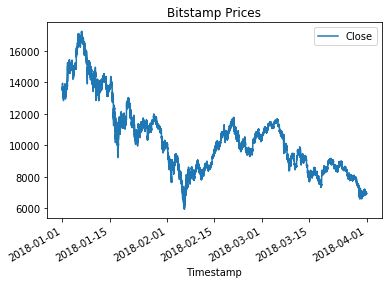

In [56]:
bitstamp_sliced.plot(title='Bitstamp Prices')

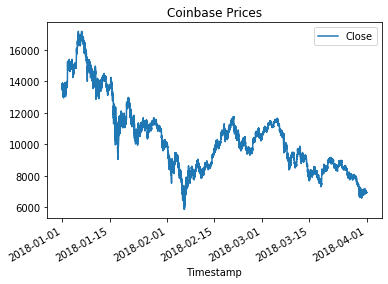

In [57]:
coinbase_sliced.plot(title='Coinbase Prices')

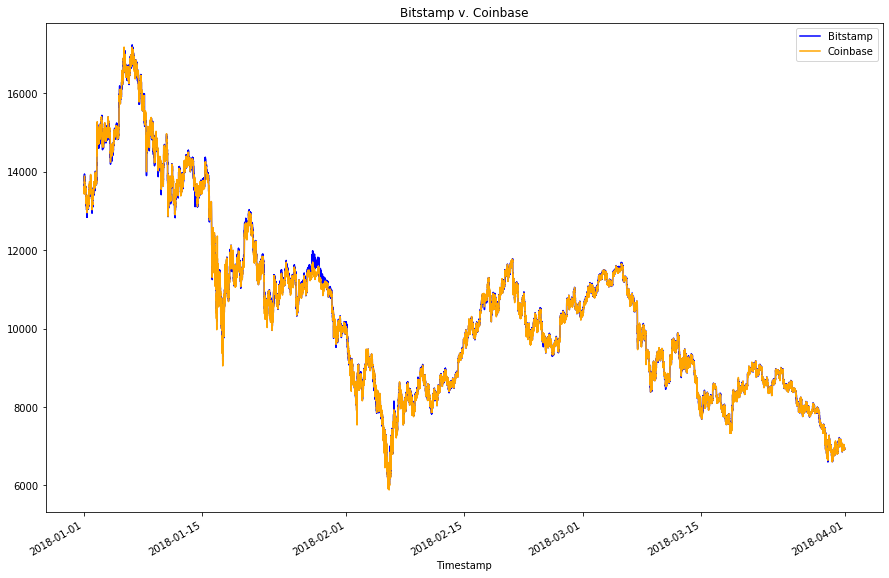

In [58]:
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="Bitstamp")

coinbase_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="orange", label="Coinbase")

### January 2018 Visualization

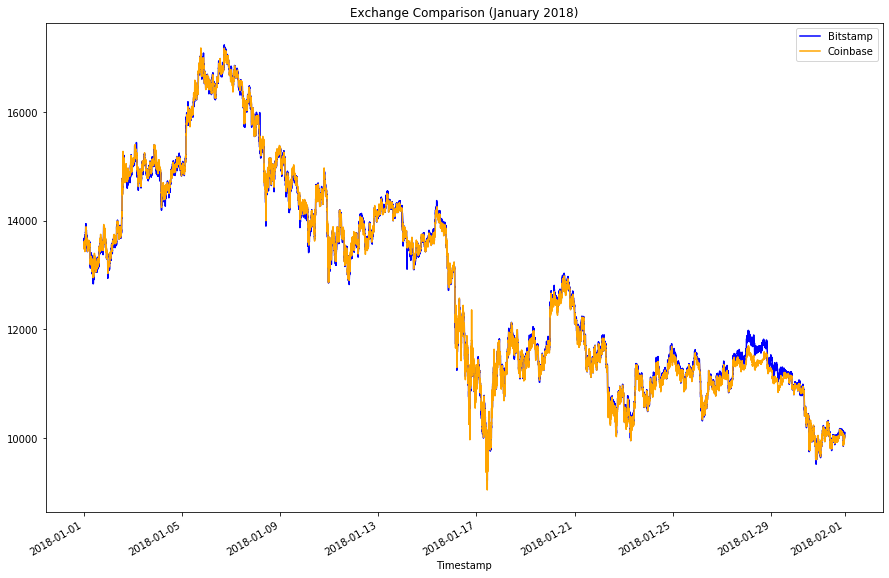

In [60]:
bitstamp_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), title="Exchange Comparison (January 2018)", color="blue", label="Bitstamp")

coinbase_sliced['Close'].loc['2018-01-01':'2018-01-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

### March 2018 Visualization

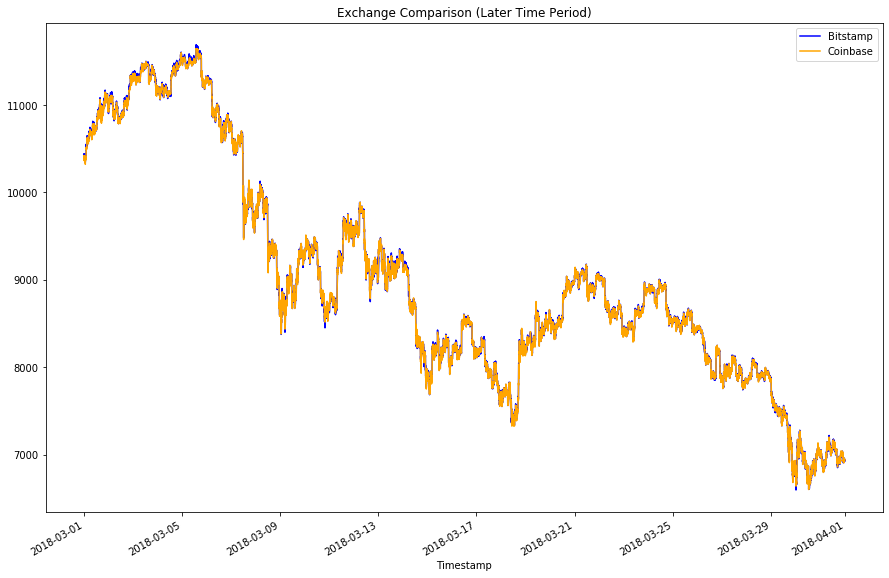

In [61]:
bitstamp_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), title="Exchange Comparison (Later Time Period)", color="blue", label="Bitstamp")

coinbase_sliced['Close'].loc['2018-03-01':'2018-03-31'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")

January and March comparison has the degree of spread change as time progresss:
March has a slightly larger spread toward the end on the month



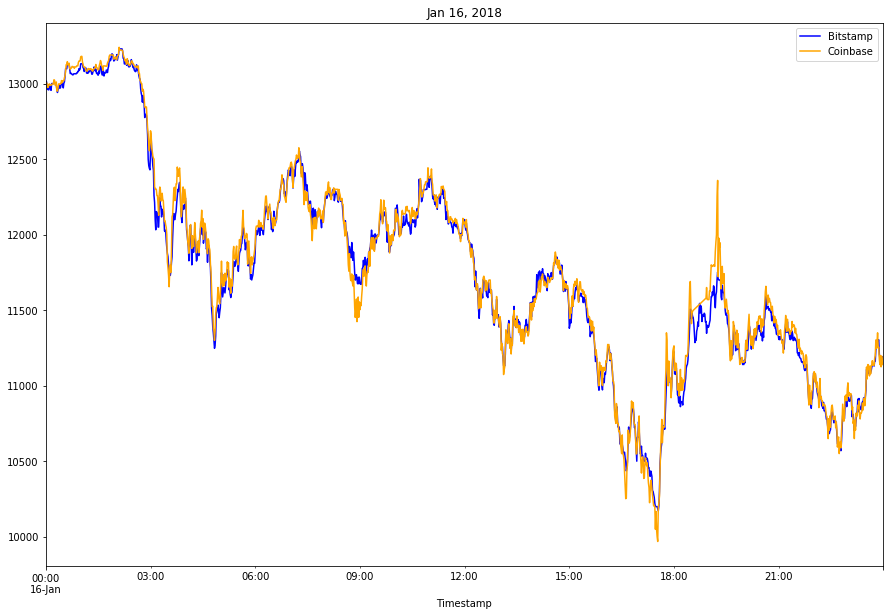

In [63]:
bitstamp_sliced['Close'].loc['2018-01-16'].plot(legend=True, figsize=(15, 10), title="Jan 16, 2018", color="blue", label="Bitstamp")

coinbase_sliced['Close'].loc['2018-01-16'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")